<a href="https://colab.research.google.com/github/AgapovKS/dz4sf/blob/main/Agapov_dz4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q -U kaggle_environments

In [ ]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns

from kaggle_environments import make, evaluate

Начнем с элементарных агентов:

Опишем поведение агента, всегда играющего "камень" - это значение 0

In [ ]:
# 1. Агент, который всегда выбирает "камень"
%%writefile rock_agent.py

def rock_agent(observation, configuration):
  """
  Агент, который всегда выбирает камень (0).
  """
  return 0

Overwriting rock_agent.py


Опишем поведение агента, всегда играющего "бумага" - это значение 1

In [ ]:
# 2. Агент, который всегда выбирает "бумагу"
%%writefile paper_agent.py

def paper_agent(observation, configuration):
  """
  Агент, который всегда выбирает бумага (1).
  """
  return 1

Overwriting paper_agent.py


Опишем поведение агента, всегда играющего "ножницы" - это значение 2

In [ ]:
# 3. Агент, который всегда выбирает "ножницы"
%%writefile scissors_agent.py

def scissors_agent(observation, configuration):
  """
  Агент, который всегда выбирает ножницы (2).
  """
  return 2

Overwriting scissors_agent.py


Попробуем теперь использовать информацию о прошлых действиях противника. Опишем агента, который производит то же самое действие, что и оппонент на прошлом ходу

In [ ]:
# 4. Агент, который копирует последний ход оппонента

%%writefile copy_opponent_agent.py
import random

def copy_opponent_agent(observation, configuration):
  """
  Копирует последний ход противника. Если хода не было, выбирает случайно.
  """
  if observation.step > 0:
    return observation.lastOpponentAction
  else:
    return random.randrange(0, configuration.signs)

Overwriting copy_opponent_agent.py


Опишем нескольких агентов выбирающих случайное значение

In [ ]:
# 5. Агент по принципу случайного выбора между всеми вариантами

%%writefile full_rand_agent.py
import random

def full_rand_agent(observation, configuration):
  """
  Случайный выбор действия: 'камень' (0), 'бумага' (1) или 'ножницы' (2).
  """
  return random.randint(0, 2)

Overwriting full_rand_agent.py


In [ ]:
# 6. Агент по принципу случайного выбора между 'камнем' (0) и 'бумагой' (1)

%%writefile rock_paper_agent.py
import random

def rock_paper_agent(observation, configuration):
  """
  Случайный выбор действия: 'камень' (0), 'бумага' (1)
  """
  return random.randint(0, 1)

Overwriting rock_paper_agent.py


In [ ]:
# 6. Агент по принципу случайного выбора между 'бумагой' (1) и 'ножницами' (2)

%%writefile paper_scissors_agent.py
import random

def paper_scissors_agent(observation, configuration):
  """
  Случайный выбор действия: 'бумага' (1) и 'ножницы' (2)
  """
  return random.randint(1, 2)

Overwriting paper_scissors_agent.py


In [ ]:
# 7. Агент по принципу случайного выбора между 'камнем' (0) и 'ножницами' (2)

%%writefile rock_scissors_agent.py
import random

def rock_scissors_agent(observation, configuration):
  """
  Случайный выбор действия: 'камень' (0) и 'ножницы' (2)
  """
  choices = [0,2]
  return random.choice(choices)

Overwriting rock_scissors_agent.py


Опишем более сложных агентов:

Опишем поведение агента, который запоминает ходы, чтобы противодействовать им

In [ ]:
# 8. Агент, который анализирует статистику ходов противника
%%writefile statistical_agent.py

action_histogram = {}
import random

def statistical_agent(observation, configuration):
    """
    Запоминает ходы противника и выбирает действие, чтобы противодействовать
    наиболее частому ходу противника.
    """
    global action_histogram
    if observation.step == 0:
        action_histogram = {}  # очищает историю в начале
        return random.randint(0, 2)  # случайный ход в начале
    else:
      action = observation.lastOpponentAction
      action_histogram[action] = action_histogram.get(action, 0) + 1  # считает ходы противника

      mode_action = max(action_histogram, key=action_histogram.get)  # находит наиболее частый ход
      return (mode_action + 1) % configuration.signs

Overwriting statistical_agent.py


Опишем поведение агента, который копирует частые ходы противника

In [ ]:
# 9. Агент, который анализирует статистику ходов противника и при этом копирует ее
%%writefile stat_copy_agent.py

import random
action_histogram = {}
def stat_copy_agent(observation, configuration):
    """
    Запоминает ходы противника и выбирает самое частое его действие.
    """
    global action_histogram
    if observation.step == 0:
        action_histogram = {}  # очищает историю в начале
        return random.randint(0, 2)  # случайный ход в начале

    action = observation.lastOpponentAction
    action_histogram[action] = action_histogram.get(action, 0) + 1  # считает ходы противника

    mode_action = max(action_histogram, key=action_histogram.get)  # находит наиболее частый ход
    return mode_action % configuration.signs

Overwriting stat_copy_agent.py


In [ ]:
# 10. Агент, который выбирает действие в зависимости от последних ходов

%%writefile counter_reactionary_agent.py
import random
import math

last_counter_action = None
def get_score(left_move, right_move):
    """
    Возвращает счет на основе разницы между ходами.
    """
    delta = (
        right_move - left_move
        if (left_move + right_move) % 2 == 0
        else left_move - right_move
    )
    return 0 if delta == 0 else math.copysign(1, delta)

def counter_reactionary_agent(observation, configuration):
    """
    Если агент выиграл, выбирает действие, чтобы противодействовать.
    Иначе адаптируется к ходу противника.
    """
    global last_counter_action
    if observation.step == 0:
        last_counter_action = random.randrange(0, configuration.signs)  # случайный первый ход
    elif get_score(last_counter_action, observation.lastOpponentAction) == 1:
        last_counter_action = (last_counter_action + 2) % configuration.signs  # если выиграл, выбирает контр-ход
    else:
        last_counter_action = (observation.lastOpponentAction + 1) % configuration.signs  # выбирает ход противника + 1

    return last_counter_action

Overwriting counter_reactionary_agent.py


Опишем теперь поведения агентов, которые зависят от последних ходов противников

In [ ]:
# 11. Агент, который реагирует на последние действия противника

%%writefile reactionary_agent.py
import random
import math

def get_score(left_move, right_move):
    """
    Вычисляет результат последнего действия.
    Возвращает 0 при ничьей, 1 при выигрыше и -1 при проигрыше.
    """
    delta = (
        right_move - left_move
        if (left_move + right_move) % 2 == 0
        else left_move - right_move
    )
    return 0 if delta == 0 else math.copysign(1, delta)

last_react_action = None
def reactionary_agent(observation, configuration):
    """
    Агент реагирует на последние действия противника.
    Если предыдущий ход был проигран, выбирает новый ход.
    """
    global last_react_action
    if observation.step == 0:
        last_react_action = random.randrange(0, configuration.signs)  # случайный первый ход
    elif get_score(last_react_action, observation.lastOpponentAction) <= 1:
        last_react_action = (observation.lastOpponentAction + 1) % configuration.signs  # выбирает следующий ход

    return last_react_action

Overwriting reactionary_agent.py


In [ ]:
# 12. Агент, который копирует случайным образом одно из двух последних действий соперника
%%writefile two_copy_agent.py
import random

opponent_history = []

def two_copy_agent(observation, configuration):
    """
    Анализирует последние два хода противника, и копирует случайно один из них.
    Если данных недостаточно, то выбирает случайный ход.
    """
    global opponent_history

    if observation.step == 0:
        opponent_history = []  # Очистка истории на первом шаге
        return random.randint(0, configuration.signs - 1)

    # Добавляем последний ход противника в историю
    opponent_history.append(observation.lastOpponentAction)

    if len(opponent_history) < 2:
        # Если в истории недостаточно данных, выбираем случайный ход
        return random.randint(0, configuration.signs - 1)

    # Получаем последние два хода противника
    last_action = opponent_history[-1]
    prev_action = opponent_history[-2]

    choices = [last_action, prev_action]
    return random.choice(choices)



Overwriting two_copy_agent.py


Воспользуемся функцией evaluate из библиотеки kaggle_environments с помощью которой запустим наших агентов и проведем эксперимент на заданном количестве игр

In [ ]:
# Турнир между агентами
agents = ['rock_agent', 'paper_agent', 'scissors_agent',
          'copy_opponent_agent', 'full_rand_agent',
          'rock_paper_agent', 'paper_scissors_agent',
          'rock_scissors_agent', 'statistical_agent',
          'stat_copy_agent', 'counter_reactionary_agent',
          'reactionary_agent', 'two_copy_agent']

# Добавляем .py к каждому агенту
agents_py = [i + ".py" for i in agents]
n_agents = len(agents)

# Инициализируем матрицу результатов
scores = np.zeros((n_agents, n_agents))

for i in range(n_agents):
    for j in range(i + 1, n_agents):
        result = evaluate("rps", [agents_py[i], agents_py[j]], configuration={"episodeSteps": 100}, num_episodes=1)
        scores[i][j] = result[0][0]  # сохраняем результат для агента i
        scores[j][i] = result[0][1]  # сохраняем результат для агента j

# Определяем победителя
vic = []
for i in range(n_agents):
    cnt_vic = sum(1 for j in range(n_agents) if scores[i][j] > 0)  # считаем победы агента
    vic.append(cnt_vic)

# Определяем индексы победителей
i_victors = [i for i, v in enumerate(vic) if v == max(vic)]
if len(i_victors) > 1:
    print("The winners are", '\n', *[agents_py[i] for i in i_victors], "!")
else:
    print("The winner is", agents_py[i_victors[0]], "!")

The winner is reactionary_agent.py !


Как мы видим, самая выигрышная стратегия у reactionary_agent

In [ ]:
# Построение матрицы
df_scores = pd.DataFrame(scores, index=agents, columns=agents)
df_scores

,rock_agent,paper_agent,scissors_agent,copy_opponent_agent,full_rand_agent,rock_paper_agent,paper_scissors_agent,rock_scissors_agent,statistical_agent,stat_copy_agent,counter_reactionary_agent,reactionary_agent,two_copy_agent
rock_agent,0.0,-99.0,99.0,0.0,-22.0,-56.0,0.0,52.0,-99.0,0.0,-48.0,-99.0,0.0
paper_agent,99.0,0.0,-99.0,0.0,0.0,46.0,-51.0,0.0,-98.0,0.0,-49.0,-99.0,0.0
scissors_agent,-99.0,99.0,0.0,0.0,0.0,0.0,45.0,-49.0,-97.0,0.0,-48.0,-98.0,0.0
copy_opponent_agent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-22.0,0.0,96.0,-50.0,0.0
full_rand_agent,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-20.0,0.0
rock_paper_agent,56.0,-46.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,28.0,0.0,-31.0,0.0
paper_scissors_agent,0.0,51.0,-45.0,0.0,0.0,0.0,0.0,0.0,0.0,-42.0,0.0,0.0,0.0
rock_scissors_agent,-52.0,0.0,49.0,0.0,0.0,-25.0,0.0,0.0,-24.0,31.0,0.0,-32.0,0.0
statistical_agent,99.0,98.0,97.0,22.0,0.0,0.0,0.0,24.0,0.0,44.0,0.0,-59.0,25.0
stat_copy_agent,0.0,0.0,0.0,0.0,0.0,-28.0,42.0,-31.0,-44.0,0.0,-49.0,-78.0,0.0


Провизуалируем результат

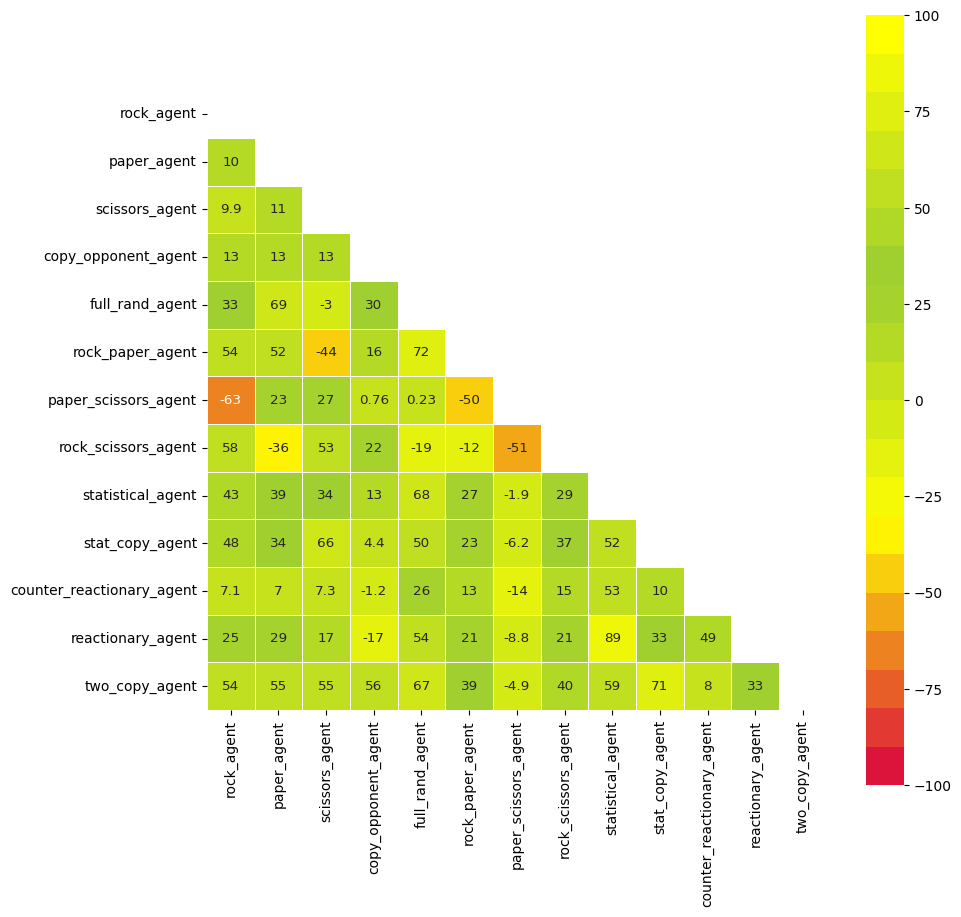

In [ ]:
import math
from matplotlib.colors import LinearSegmentedColormap

cmatrix = df_scores.corr() * 100
cmap = LinearSegmentedColormap.from_list('RedGreenRed', ['crimson', 'yellow', 'yellowgreen', 'yellow'], 20)
mask = np.triu(np.ones(cmatrix.shape[0]), k=0)

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(ax=ax, data=cmatrix, cmap=cmap, vmin=-100, vmax=100, linewidths=.5, square=True, annot=True, mask=mask, annot_kws={'size':35 / math.sqrt(cmatrix.shape[0])})
plt.show()

Проведем дополнительные эксперименты в окружении:

In [ ]:
# Создаем окружение для игры с заданным количеством шагов (ходов)
env = make("rps", configuration={"episodeSteps": 100})

# Здесь загружаем созданных агентов
# (предполагается, что файлы агентов уже созданы, как показано ранее)

# Дополнительные эксперименты: запуск определенных агентов против друг друга

# 1. Запускаем игру между агентом reactionary_agent и rock_agent
env.run(["reactionary_agent.py", "rock_agent.py"])
env.render(mode="ipython", width=500, height=400)
print("Результат reactionary_agent против rock_agent:", evaluate("rps", ["reactionary_agent.py", "rock_agent.py"], configuration={"episodeSteps": 1000}))

Результат reactionary_agent против rock_agent: [[997.0, -997.0]]


In [ ]:
# 2. Запускаем игру между агентом copy_opponent и агентом reactionary_agent
env.run(["copy_opponent_agent.py", "reactionary_agent.py"])
env.render(mode="ipython", width=500, height=400)
print("Результат copy_opponent против reactionary_agent:", evaluate("rps", ["copy_opponent_agent.py", "reactionary_agent.py"], configuration={"episodeSteps": 1000}))

Результат copy_opponent против reactionary_agent: [[-499.0, 499.0]]


In [ ]:
# 3. Запускаем игру между агентом statistical_agent и агентом copy_opponent_agent
env.run(["statistical_agent.py", "copy_opponent_agent.py"])
env.render(mode="ipython", width=500, height=400)
print("Результат statistical_agent против copy_opponent_agent:", evaluate("rps", ["statistical_agent.py", "copy_opponent_agent.py"], configuration={"episodeSteps": 1000}))

Результат statistical_agent против copy_opponent_agent: [[247.0, -247.0]]


In [ ]:
# 4. Запускаем игру между двумя агентами reactionary_agent
env.run(["reactionary_agent.py", "reactionary_agent.py"])
env.render(mode="ipython", width=500, height=400)
print("Результат reactionary_agent против reactionary_agent:", evaluate("rps", ["reactionary_agent.py", "reactionary_agent.py"], configuration={"episodeSteps": 1000}))

Результат reactionary_agent против reactionary_agent: [[0, 0]]


In [ ]:
# 5. Запускаем игру между агентом statistical_agent и агентом two_copy_agent
env.run(["statistical_agent.py", "two_copy_agent.py"])
env.render(mode="ipython", width=500, height=400)
print("Результат statistical_agent против two_copy_agent:", evaluate("rps", ["statistical_agent.py", "two_copy_agent.py"], configuration={"episodeSteps": 1000}))

Результат statistical_agent против two_copy_agent: [[233.0, -233.0]]


In [ ]:
# 6. Запускаем игру между агентами reactionary_agent и statistical_agent
env.run(["reactionary_agent.py", "statistical_agent.py"])
env.render(mode="ipython", width=500, height=400)
print("Результат reactionary_agent против statistical_agent :", evaluate("rps", ["reactionary_agent.py", "statistical_agent.py"], configuration={"episodeSteps": 1000}))

Результат reactionary_agent против statistical_agent : [[599.0, -599.0]]


Как мы видим, reactionary_agent показывает себя лучше всего и по этим результатам